In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2018-06-17 06:40:26--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.128, 2404:6800:4003:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: '/tmp/cats_and_dogs_filtered.zip'

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  20.5MB/s    in 3.2s    

2018-06-17 06:40:29 (20.5 MB/s) - '/tmp/cats_and_dogs_filtered.zip' saved [68606236/68606236]



In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
!ls /tmp

cats_and_dogs_filtered	cats_and_dogs_filtered.zip  tmpAL0nPs_kernels


In [6]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [16]:
train_cat_fnames = os.listdir(train_cats_dir)
print len(train_cat_fnames)
train_dog_fnames = os.listdir(train_dogs_dir)
print len(train_dog_fnames)
validation_cat_fnames = os.listdir(validation_cats_dir)
print len(validation_cat_fnames)
validation_dog_fnames = os.listdir(validation_dogs_dir)
print len(validation_dog_fnames)

1000
1000
500
500


In [22]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

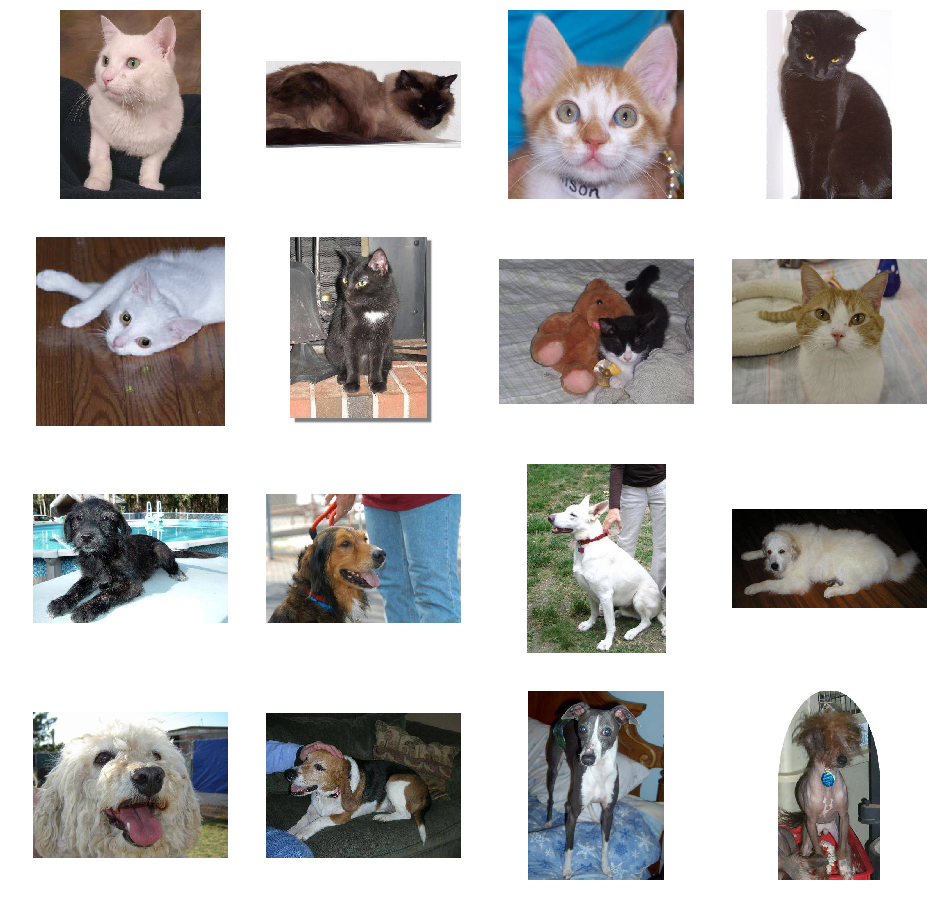

In [119]:
fig = plt.gcf()
fig.set_size_inches(nrows * 4, ncols * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

# Render
for i, img_path in enumerate(next_cat_pix + next_dog_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

In [122]:
import tensorflow as tf
tf.__version__

'1.8.0'

In [149]:
import tensorflow as tf

tf_config = tf.ConfigProto(
    gpu_options=tf.GPUOptions(allow_growth=True))
tf.keras.backend.set_session(tf.Session(config=tf_config))

img_input = tf.keras.layers.Input(shape=(150,150,3))
x = tf.keras.layers.Conv2D(16,3,activation='relu')(img_input)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(32,3,activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(64,3,activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

In [150]:
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)

output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(img_input, output)


In [151]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 64)        0         
__________

In [152]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             metrics=['acc'])

In [154]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')




Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [155]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=15,
validation_data=validation_generator,
validation_steps=50,
)

Epoch 1/15
100/100 [==============================] - 65s 651ms/step - loss: 2.2845 - acc: 0.5490 - val_loss: 0.7539 - val_acc: 0.5020
Epoch 2/15
100/100 [==============================] - 67s 667ms/step - loss: 0.6616 - acc: 0.6455 - val_loss: 0.6269 - val_acc: 0.6650
Epoch 3/15
100/100 [==============================] - 61s 607ms/step - loss: 0.5810 - acc: 0.7060 - val_loss: 0.7680 - val_acc: 0.6290
Epoch 4/15
100/100 [==============================] - 63s 627ms/step - loss: 0.4860 - acc: 0.7660 - val_loss: 0.5739 - val_acc: 0.7190
Epoch 5/15
100/100 [==============================] - 64s 637ms/step - loss: 0.4299 - acc: 0.7990 - val_loss: 0.7093 - val_acc: 0.6810
Epoch 6/15
100/100 [==============================] - 59s 590ms/step - loss: 0.3530 - acc: 0.8430 - val_loss: 0.8402 - val_acc: 0.6720
Epoch 7/15
100/100 [==============================] - 60s 604ms/step - loss: 0.2592 - acc: 0.8900 - val_loss: 1.0990 - val_acc: 0.6410
Epoch 8/15
100/100 [==============================] - 6